In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 20)

In [3]:
data = pd.read_csv('HeartAttack_data.csv', index_col=False)
print("\n\n\nSample HeartAttack dataset head(5) :- \n\n", data.head(5) )




Sample HeartAttack dataset head(5) :- 

    age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca thal  num
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?    ?    0
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?    ?    0
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?    ?    0
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?    6    0
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?    ?    0


In [4]:
print("\n\n\nShape of the HeartAttack dataset  data.shape = ", end="")
print( data.shape)




Shape of the HeartAttack dataset  data.shape = (294, 14)


In [5]:
array=data.values

In [6]:
print("\n\n\nHeartAttack data decription : \n")
print( data.describe() )




HeartAttack data decription : 

              age         sex          cp     oldpeak         num
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.000000    1.000000    3.000000    0.000000    0.000000
75%     54.000000    1.000000    4.000000    1.000000    1.000000
max     66.000000    1.000000    4.000000    5.000000    1.000000


In [7]:
data.replace('?',np.nan,inplace =True)

In [8]:
new_data=data.drop(['slope', 'ca', 'thal'], axis=1)
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [9]:
datas = new_data.fillna(new_data.median())
datas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [10]:
datas.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [11]:
datas.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,294,294.0,294,294,294,294,294.000000,294.000000
unique,NaN,NaN,NaN,32,154.0,3,4,72,3,NaN,NaN
top,NaN,NaN,NaN,120,243.0,0,0,150,0,NaN,NaN
freq,NaN,NaN,NaN,65,23.0,266,235,29,204,NaN,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000


In [12]:
y=pd.DataFrame(datas)
y

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


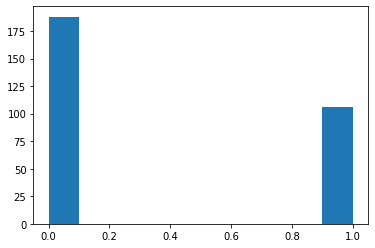

In [13]:
plt.hist(data['num'])
plt.show()

In [14]:
print("\n\n\ndata.groupby('num').size()\n")
print(data.groupby('num').size())




data.groupby('num').size()

num
0    188
1    106
dtype: int64


In [15]:
y.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
num           int64
dtype: object

In [16]:
y['trestbps'] = y['trestbps'].astype(float)
y['chol'] = y['chol'].astype(float)
y['fbs'] = y['fbs'].astype(float)
y['restecg'] = y['restecg'].astype(float)
y['thalach'] = y['thalach'].astype(float)
y['exang'] = y['exang'].astype(float)
y['oldpeak'] = y['oldpeak'].astype(float)

In [17]:
y.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num           int64
dtype: object

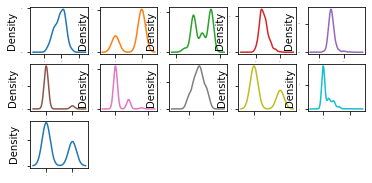

In [18]:
y.plot(kind='density', subplots=True, layout=(4,5), sharex=False, legend=False, fontsize=1)
plt.show()

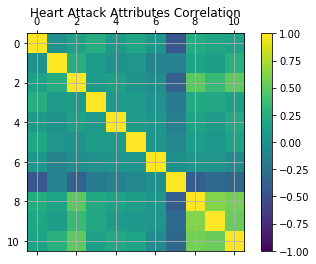

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.matshow(y.corr(), vmin=-1, vmax=1 )
ax1.grid(True)
plt.title('Heart Attack Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax)
plt.show()

In [20]:
Y = y['num'].values
x = y.drop('num', axis=1).values
test = SelectKBest(score_func=chi2, k=7) #K - how many best columns
fit = test.fit(x, Y)
X = fit.transform(x)
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.33, random_state=21)
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('LDA', LinearDiscriminantAnalysis()))
num_folds = 10

results = []
names = []
for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    startTime = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    endTime = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), endTime-startTime))

(294, 7)
CART: 0.704211 (0.052949) (run time: 0.111598)
SVM: 0.657105 (0.148707) (run time: 0.080742)
NB: 0.821053 (0.076651) (run time: 0.053506)
KNN: 0.611316 (0.132492) (run time: 0.062461)
LDA: 0.805789 (0.068358) (run time: 0.886936)


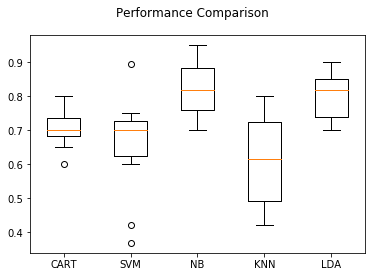

In [21]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
pipelines=[]
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis( ))])))
results = []
names = []



print("\n\n\nAccuracies of algorithm after scaled dataset\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))





Accuracies of algorithm after scaled dataset

ScaledCART: 0.709211 (0.059502) (run time: 0.153767)
ScaledSVM: 0.785000 (0.101089) (run time: 0.132094)
ScaledNB: 0.821053 (0.076651) (run time: 0.080008)
ScaledKNN: 0.775000 (0.062776) (run time: 0.120000)
ScaledLDA: 0.805789 (0.068358) (run time: 0.096425)


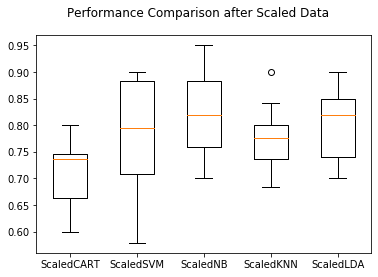

In [23]:
fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

model = GaussianNB()
start = time.time()
model.fit(X_train_scaled, Y_train)   #Training of algorithm
end = time.time()
print( "\n\nGaussianNB Training Completed. It's Run Time: %f" % (end-start))



GaussianNB Training Completed. It's Run Time: 0.000000


In [30]:
X_test_scaled = scaler.transform(X_test)

predictions = model.predict(X_test_scaled)
print("All predictions done successfully by GaussianNB Machine Learning Algorithms")
print("\n\nAccuracy score %f" % accuracy_score(Y_test, predictions))

print("\n")
print("confusion_matrix = \n")
print( confusion_matrix(Y_test, predictions))
print("\nML solution proposed by : Muskan Gupta")
print("EMAIL ID : muskangupta042002@gmail.com") 
print("Student ID : 376095")

All predictions done successfully by GaussianNB Machine Learning Algorithms


Accuracy score 0.867347


confusion_matrix = 

[[55  3]
 [10 30]]

ML solution proposed by : Muskan Gupta
EMAIL ID : muskangupta042002@gmail.com
Student ID : 376095


In [29]:
from sklearn.externals import joblib
filename =  "finalized_HeartAttack_model.sav"
joblib.dump(model, filename)
print( "Best Performing Model dumped successfully into a file by Joblib")

Best Performing Model dumped successfully into a file by Joblib


In [2]:
import tensorflow as tf
print(tf.__version__)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

1.14.0
